# Coronary Heart Disease


A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- *sbp*	-	systolic blood pressure
- *tobacco*	-	cumulative tobacco (kg)
- *ldl*	-	low densiity lipoprotein cholesterol
- *adiposity* - https://en.m.wikipedia.org/wiki/Body_adiposity_index
- *famhist*	-	family history of heart disease (Present, Absent)
- *typea*	-	type-A behavior
- *obesity* - https://en.wikipedia.org/wiki/Obesity
- *alcohol*	-	current alcohol consumption
- *age*	-	age at onset
- *chd*	-	response, coronary heart disease

The dataset is taken from 

http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data

Description is available at

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt

### Step 1: Loading the dataset

- Load the data file SAheart.data. This is csv file.

In [1]:
import pandas as pd

In [2]:
heart_df = pd.read_csv( "./data/SAheart.data" )

In [3]:
heart_df.head(5)

row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1

### Step 2: Finding Metadata 

- Find how many rows and columns available in the dataset.
- Find the columns types of the dataset.

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


### Step 3: Print Records

- Print first 5 records of the dataset
- Print last 5 records of the dataset
- Print records with index ranging from 10 to 20 with columns "sbp", "ldl" and "chd".

### Step 4: How many persons have *chd* and *no chd* in the dataset?

- Normalize the results with respect to total number of records in the dataset

In [5]:
heart_df.chd.value_counts(normalize = True)

0    0.65368
1    0.34632
Name: chd, dtype: float64

In [6]:
heart_df.famhist.value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

### Step 5: Does *famhist* have any impact on *chd*?

https://seaborn.pydata.org/generated/seaborn.catplot.html

Note: Draw a catplot. Refer to the link below. Set the values as below.

- x = 'famhist'
- kind = 'count'
- hue = 'chd'


In [7]:
import seaborn as sn

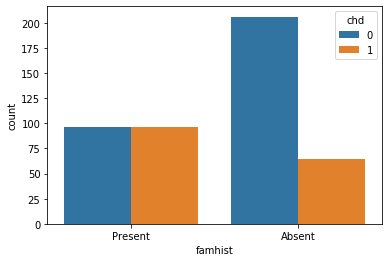

In [9]:
sn.countplot( data = heart_df,
              x = 'famhist',
              hue = 'chd');

### Step 6: Is there any difference in alcohol consumption pattern between persons having *chd* and persons having *no chd*?

In [12]:
import matplotlib.pyplot as plt

In [13]:
chd = heart_df[heart_df.chd == 1]
no_chd = heart_df[heart_df.chd == 0]

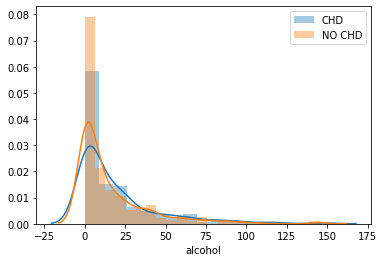

In [15]:
sn.distplot( chd['alcohol'], label = 'CHD') 
sn.distplot( no_chd['alcohol'], label = 'NO CHD') 
plt.legend();

### Step 7: Does *age* has any impact on *chd*?

Note: Overlapped distribution plot.

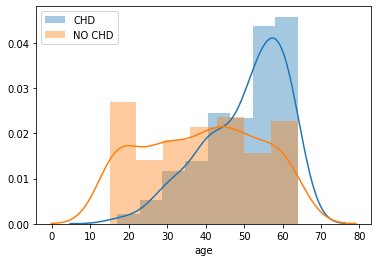

In [16]:
sn.distplot( chd['age'], label = 'CHD') 
sn.distplot( no_chd['age'], label = 'NO CHD') 
plt.legend();

### Step 8: Create a column called "has_famhist" and set to 1 if the person has famhist "Present" or set to 0 if the person has famhist "Absent"

In [24]:
heart_df['has_famhist'] = heart_df.famhist.map(lambda x: 1 if x == 'Present' else 0)

In [26]:
heart_df[['famhist', 'has_famhist']][0:5]

famhist  has_famhist
0  Present            1
1   Absent            0
2  Present            1
3  Present            1
4  Present            1

### Step 9: Are ldl and obesity correlated? Do they have positive or negative correlation?

Note: Draw a scatter plot.

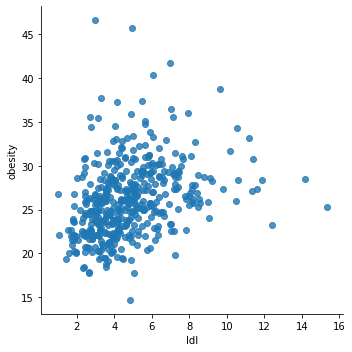

In [29]:
sn.lmplot( data = heart_df,
           x = 'ldl',
           y = 'obesity',
           fit_reg = False);

### Step 10: Create a heatmap between the following variables?

- ldl
- obeisity
- tobacco
- age
- sbp
- typea

Infer which two variables are most correlated?

In [30]:
corr_mat = heart_df[['age',
                      'ldl',
                      'obesity',
                      'sbp',
                      'typea',
                      'tobacco']].corr()

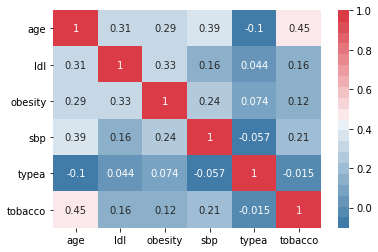

In [32]:
sn.heatmap( corr_mat,
            annot = True,
            cmap = sn.diverging_palette(240, 10, n = 20));

### Step 11: What is the range of ldl and sbp for 95% of people suffering from chd?

In [34]:
from scipy import stats

In [35]:
stats.norm.interval( 0.95,
                     chd['ldl'].mean(),
                     chd['ldl'].std() )

(1.1268745781411615, 9.84900042185884)

### Step 12: Are the age of some people suffering from chd seem abnormal i.e. very low age?

Note: Find Outliers

In [39]:
age_mean = chd['age'].mean()
age_mean

50.29375

In [41]:
age_std = chd['age'].std()
age_std

10.649118943684005

In [42]:
low_age = age_mean - 3 * age_std

In [43]:
low_age

18.346393168947987

In [44]:
chd[chd.age < low_age]

row.names  sbp  tobacco   ldl  adiposity famhist  typea  obesity  \
260        261  118      0.0  2.39      12.13  Absent     49    18.46   

     alcohol  age  chd  
260     0.26   17    1

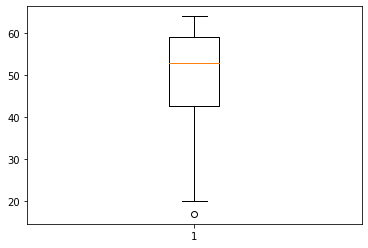

In [46]:
plt.boxplot( chd['age'] );

### Note:

**Name**: &lt;Fill your Name Here &gt;

After completing the exercises, export the file as html file and store it.